In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!mkdir -p /content/drive/MyDrive/DCGAN_Project/{data,outputs,checkpoints}


In [ ]:
!wget https://datarepo.s3.amazonaws.com/intel-image-classification.zip
!unzip -q intel-image-classification.zip -d /content/data/


--2025-10-15 23:22:23--  https://datarepo.s3.amazonaws.com/intel-image-classification.zip
Resolving datarepo.s3.amazonaws.com (datarepo.s3.amazonaws.com)... 52.219.232.220, 3.5.128.138, 3.5.130.149, ...
Connecting to datarepo.s3.amazonaws.com (datarepo.s3.amazonaws.com)|52.219.232.220|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-10-15 23:22:24 ERROR 403: Forbidden.

unzip:  cannot find or open intel-image-classification.zip, intel-image-classification.zip.zip or intel-image-classification.zip.ZIP.


In [5]:
!pip install torch torchvision torchaudio pytorch-fid tqdm wandb optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 19.4 MB/s eta 0:00:00


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# Directories
DATA_DIR = "/content/data"  # change if needed
OUTPUT_DIR = "/content/drive/MyDrive/DCGAN_Project"
os.makedirs(f"{OUTPUT_DIR}/checkpoints", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/samples", exist_ok=True)

# Hyperparameters
image_size = 64
batch_size = 128
nz = 100          # latent vector size
ngf = 64          # generator feature maps
ndf = 64          # discriminator feature maps
num_epochs = 100
lr = 0.0002
beta1 = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device:", device)


Device: cuda


In [ ]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(root=DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)
print(f"Dataset size: {len(dataset)} images")


FileNotFoundError: [Errno 2] No such file or directory: '/content/data'

In [ ]:
!ls /content


drive  sample_data


In [ ]:
!wget -q https://datarepo.s3.amazonaws.com/intel-image-classification.zip
!unzip -q intel-image-classification.zip -d /content/
!mv /content/seg_train/seg_train /content/data/


unzip:  cannot find or open intel-image-classification.zip, intel-image-classification.zip.zip or intel-image-classification.zip.ZIP.
mv: cannot stat '/content/seg_train/seg_train': No such file or directory


In [ ]:
!gdown 1kqJzjkA99H7d8x3xpy1oHuP3Y9S5ZpjR -O intel-image-classification.zip
!unzip -q intel-image-classification.zip -d /content/
!mkdir -p /content/data
!mv /content/seg_train/seg_train /content/data/


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1kqJzjkA99H7d8x3xpy1oHuP3Y9S5ZpjR

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open intel-image-classification.zip, intel-image-classification.zip.zip or intel-image-classification.zip.ZIP.
mv: cannot stat '/content/seg_train/seg_train': No such file or directory


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json (API key from your Kaggle account)
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -q intel-image-classification.zip -d /content/
!mkdir -p /content/data
!mv /content/seg_train/seg_train /content/data/


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open intel-image-classification.zip, intel-image-classification.zip.zip or intel-image-classification.zip.ZIP.
mv: cannot stat '/cont

In [8]:
!pip install -q kaggle


In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farnazalamahmed","key":"e8fb0996bd3badd4922b6b1d54a3435f"}'}

In [10]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d puneet6060/intel-image-classification


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 343M/346M [00:03<00:00, 105MB/s] 
100% 346M/346M [00:03<00:00, 114MB/s]


In [12]:
!unzip -q intel-image-classification.zip -d /content/
!mkdir -p /content/data
!mv /content/seg_train/seg_train /content/data/


In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

image_size = 64
batch_size = 128

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.ImageFolder(root="/content/data", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)
print(f"✅ Dataset ready: {len(dataset)} images loaded.")


✅ Dataset ready: 14034 images loaded.


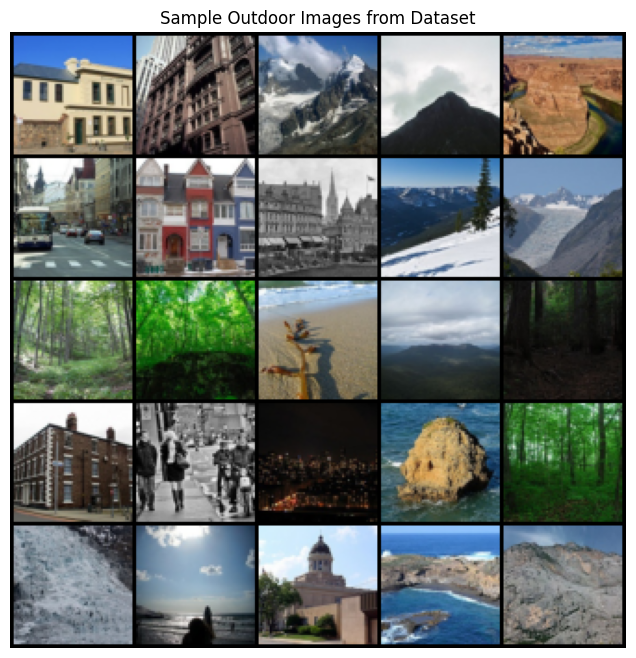

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get a batch of real images
dataiter = iter(dataloader)
images, _ = next(dataiter)

# Denormalize for display
grid = torchvision.utils.make_grid(images[:25], nrow=5, normalize=True)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Sample Outdoor Images from Dataset")
plt.imshow(np.transpose(grid, (1, 2, 0)))
plt.show()


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils

# Device setup (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
image_size = 64      # Image resolution (matches dataset transform)
nz = 100             # Size of latent vector (z)
ngf = 64             # Generator feature maps
ndf = 64             # Discriminator feature maps
nc = 3               # Number of image channels (RGB)
lr = 0.0002          # Learning rate
beta1 = 0.5          # Adam beta1
epochs = 100         # You can start with 30–50 for a quick test


Using device: cuda


In [16]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Input Z: (nz) → (ngf*8 x 4 x 4)
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            # (ngf*8 x 4 x 4) → (ngf*4 x 8 x 8)
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            # (ngf*4 x 8 x 8) → (ngf*2 x 16 x 16)
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            # (ngf*2 x 16 x 16) → (ngf x 32 x 32)
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            # (ngf x 32 x 32) → (nc x 64 x 64)
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # (nc x 64 x 64) → (ndf x 32 x 32)
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            # (ndf x 32 x 32) → (ndf*2 x 16 x 16)
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            # (ndf*2 x 16 x 16) → (ndf*4 x 8 x 8)
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            # (ndf*4 x 8 x 8) → (ndf*8 x 4 x 4)
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            # (ndf*8 x 4 x 4) → (1 x 1 x 1)
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [18]:
netG = Generator().to(device)
netD = Discriminator().to(device)

# Weight initialization (helps stable training)
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

netG.apply(weights_init)
netD.apply(weights_init)

print("✅ Generator and Discriminator initialized.")


✅ Generator and Discriminator initialized.


In [19]:
criterion = nn.BCELoss()

# Create batch of latent vectors for visualization
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Labels
real_label = 1.0
fake_label = 0.0

# Optimizers (with beta1 = 0.5 for stability)
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


In [20]:
import time
import matplotlib.pyplot as plt

G_losses = []
D_losses = []
img_list = []

print("🚀 Starting Training...")
for epoch in range(epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network
        ###########################
        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        # Train with real batch
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()

        # Train with fake batch
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()

        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network
        ###########################
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        optimizerG.step()

        # Save losses
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if i % 200 == 0:
            print(f"[{epoch+1}/{epochs}] [{i}/{len(dataloader)}]  Loss_D: {errD.item():.4f}  Loss_G: {errG.item():.4f}")

    # Save fake images at epoch end
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    img_list.append(vutils.make_grid(fake, padding=2, normalize=True))


🚀 Starting Training...
[1/100] [0/110]  Loss_D: 1.2928  Loss_G: 6.7927
[2/100] [0/110]  Loss_D: 0.5693  Loss_G: 3.3203
[3/100] [0/110]  Loss_D: 1.4907  Loss_G: 4.5784
[4/100] [0/110]  Loss_D: 0.6361  Loss_G: 3.3612
[5/100] [0/110]  Loss_D: 0.3563  Loss_G: 2.8754
[6/100] [0/110]  Loss_D: 0.7307  Loss_G: 2.0558
[7/100] [0/110]  Loss_D: 0.4906  Loss_G: 2.5186
[8/100] [0/110]  Loss_D: 0.6146  Loss_G: 3.3690
[9/100] [0/110]  Loss_D: 0.6828  Loss_G: 6.2862
[10/100] [0/110]  Loss_D: 0.4094  Loss_G: 5.5430
[11/100] [0/110]  Loss_D: 0.3392  Loss_G: 4.6380
[12/100] [0/110]  Loss_D: 0.5091  Loss_G: 6.2948
[13/100] [0/110]  Loss_D: 0.4713  Loss_G: 3.3330
[14/100] [0/110]  Loss_D: 0.3110  Loss_G: 3.9044
[15/100] [0/110]  Loss_D: 0.4352  Loss_G: 5.5252
[16/100] [0/110]  Loss_D: 0.4821  Loss_G: 3.6768
[17/100] [0/110]  Loss_D: 0.7042  Loss_G: 5.2755
[18/100] [0/110]  Loss_D: 0.5087  Loss_G: 3.3416
[19/100] [0/110]  Loss_D: 3.2322  Loss_G: 0.9485
[20/100] [0/110]  Loss_D: 0.6823  Loss_G: 4.5391
[21/10

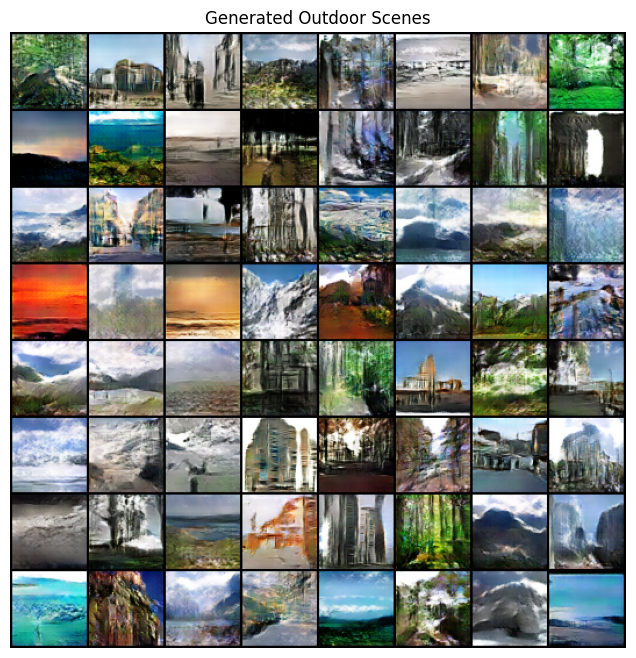

In [21]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generated Outdoor Scenes")
plt.imshow(np.transpose(img_list[-1], (1,2,0)))
plt.show()


In [22]:
# Replace with your GitHub username and repo name
!git clone https://github.com/farnazalamahmed99-cmu/DCGAN_OUTDOOR_SCENE.git
%cd DCGAN_OUTDOOR_SCENE
# Replace with your GitHub username and repo name
!git clone https://github.com/farnazalamahmed99-cmu/DCGAN_OUTDOOR_SCENE.git
%cd DCGAN_OUTDOOR_SCENE


Cloning into 'DCGAN_OUTDOOR_SCENE'...
/content/DCGAN_OUTDOOR_SCENE
Cloning into 'DCGAN_OUTDOOR_SCENE'...
/content/DCGAN_OUTDOOR_SCENE/DCGAN_OUTDOOR_SCENE


In [23]:
%cd /content/DCGAN_OUTDOOR_SCENE
!rm -rf DCGAN_OUTDOOR_SCENE


/content/DCGAN_OUTDOOR_SCENE
